# Lets predict Lung Cancer using Decision Tree Classifer

Import Section 


In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,log_loss,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import operator
import copy
import json
import pickle
import seaborn as sns

Lets work on the cancer dataset

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir lungcancer
!kaggle datasets download -d mysarahmadbhat/lung-cancer
!unzip lung-cancer.zip -d lungcancer

Saving kaggle.json to kaggle.json
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 1.48MB/s]
Archive:  lung-cancer.zip
  inflating: lungcancer/survey lung cancer.csv  


Lets Load the dataset

In [3]:
cancerdata = pd.read_csv('/content/lungcancer/survey lung cancer.csv')
cancerdata.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
cancerdata.GENDER = cancerdata.GENDER.map({'M':0,'F':1})
cancerdata.LUNG_CANCER = cancerdata.LUNG_CANCER.map({'NO':0,'YES':1})
for column in cancerdata.columns[2:-1]:
  cancerdata[column] = cancerdata[column].apply(lambda X: X-1)
cancerdata

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,0,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,0,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,0,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [5]:
X = cancerdata.drop(['LUNG_CANCER'], axis = 1)
y = cancerdata['LUNG_CANCER']

In [6]:
print('nulls in X  : \n\n' ,X.isnull().sum(),'\n')
print('nulls in y  : \n\n' ,y.isnull().sum())

nulls in X  : 

 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64 

nulls in y  : 

 0


# Now lets import Decision Tree Classifier from Sklearn and grid search for hyper parameter tuning

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(247, 15)
(62, 15)
(247,)
(62,)


In [9]:
X_train.AGE.shape

(247,)

In [10]:
scalar = StandardScaler()
X_train.AGE = scalar.fit_transform(np.array(X_train.AGE).reshape(-1,1))
X_test.AGE = scalar.transform(np.array(X_test.AGE).reshape(-1,1))


In [14]:
clf = DecisionTreeClassifier(random_state=42)
ccp_alphas = clf.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
parameters = {"criterion" : ["gini","entropy"] , "ccp_alpha" : ccp_alphas, "max_depth" : np.linspace(5, 15, num=10, dtype=int)}
classif = GridSearchCV(clf, parameters, cv = 10,scoring='accuracy',error_score='raise')
classif.fit(X_train,y_train)
classif.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0031407189301926124, max_depth=6,
                       random_state=42)

In [15]:
classif = DecisionTreeClassifier(criterion = classif.best_estimator_.criterion,ccp_alpha=classif.best_estimator_.ccp_alpha, max_depth=classif.best_estimator_.max_depth,random_state=classif.best_estimator_.random_state)
classif.fit(X_train,y_train)
print('train accuracy :',accuracy_score(y_train,classif.predict(X_train)))
print('test accuracy :',accuracy_score(y_test,classif.predict(X_test)))


train accuracy : 0.97165991902834
test accuracy : 0.8870967741935484


accuracy score : 0.8870967741935484
f1 score : 0.9333333333333333
auc score : 0.8796296296296295
log loss : 1.8100321330378455
classification report : 
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.96      0.91      0.93        54

    accuracy                           0.89        62
   macro avg       0.75      0.83      0.78        62
weighted avg       0.91      0.89      0.89        62

*********** confusion matrx ***********


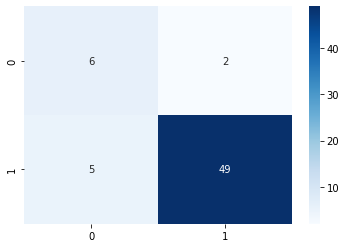

In [22]:
y_pred = classif.predict(X_test)
y_prob = classif.predict_proba(X_test)[:,[1]]
print("accuracy score :",accuracy_score(y_test,y_pred))
print("f1 score :",f1_score(y_test,y_pred))
print("auc score :",roc_auc_score(y_test,y_prob))
print("log loss :",log_loss(y_test,y_prob))
print('classification report : \n', classification_report(y_test,y_pred))
print('*********** confusion matrx ***********')
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'Blues')

In [23]:
classif.feature_importances_

array([0.        , 0.21101816, 0.06446376, 0.00529864, 0.06446376,
       0.15417011, 0.        , 0.        , 0.15945144, 0.05646904,
       0.14193238, 0.        , 0.        , 0.14273272, 0.        ])

In [24]:
classif.feature_names_in_

array(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
       'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'], dtype=object)

# lets see feature importance

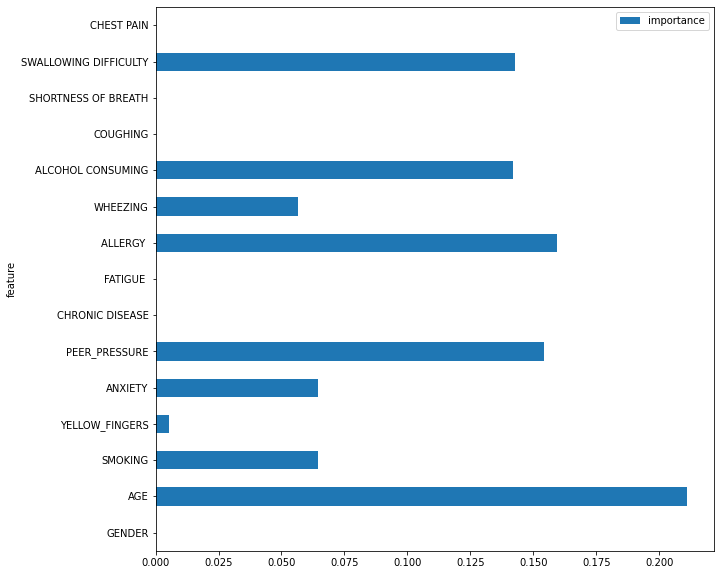

In [25]:
pd.DataFrame(data = zip(list(classif.feature_importances_),list(classif.feature_names_in_)), columns = ['importance','feature']).plot.barh(y = 'importance',x= 'feature',figsize=(10,10))


# Representing tree as text

In [28]:
text_representation = tree.export_text(classif,feature_names=list(classif.feature_names_in_))
print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)



|--- ALLERGY  <= 0.50
|   |--- SWALLOWING DIFFICULTY <= 0.50
|   |   |--- ALCOHOL CONSUMING <= 0.50
|   |   |   |--- PEER_PRESSURE <= 0.50
|   |   |   |   |--- AGE <= -0.83
|   |   |   |   |   |--- ANXIETY <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ANXIETY >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- AGE >  -0.83
|   |   |   |   |   |--- class: 0
|   |   |   |--- PEER_PRESSURE >  0.50
|   |   |   |   |--- ANXIETY <= 0.50
|   |   |   |   |   |--- SMOKING <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- SMOKING >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ANXIETY >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- ALCOHOL CONSUMING >  0.50
|   |   |   |--- WHEEZING <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- WHEEZING >  0.50
|   |   |   |   |--- AGE <= -0.90
|   |   |   |   |   |--- AGE <= -1.28
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- AGE >  -1.28
|   |   |  

# Plot tree with plot_tree

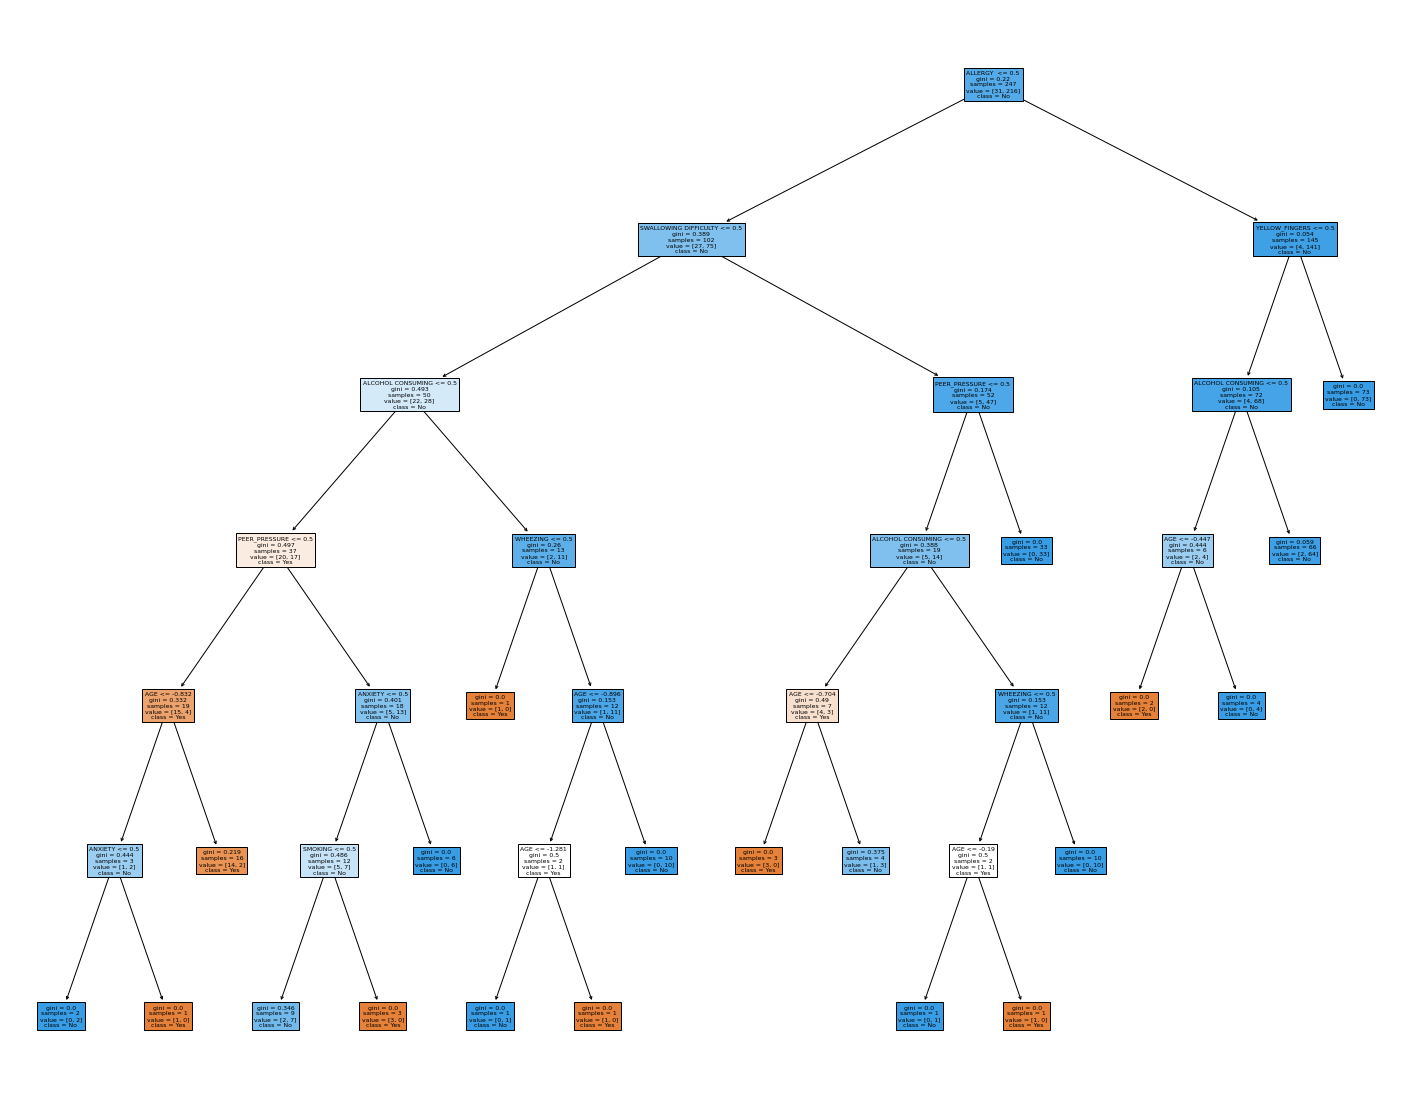

In [29]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classif,feature_names=classif.feature_names_in_,class_names=['Yes','No'],filled=True)
fig.savefig("decistion_tree.png")


# Lets Visualize Decision Tree with graphviz

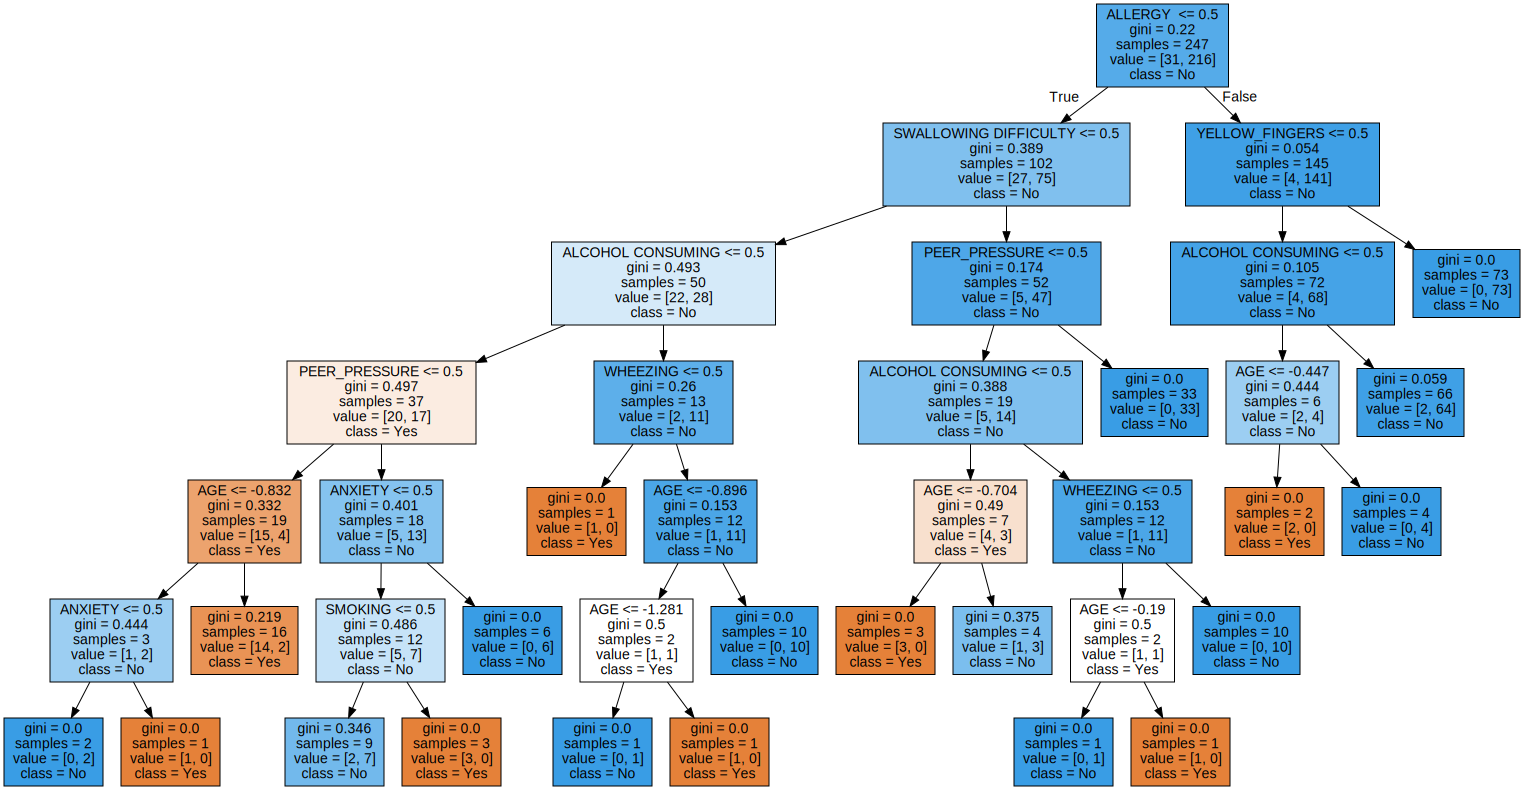

In [30]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(classif,feature_names=classif.feature_names_in_,class_names=['Yes','No'],filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph



# lets Plot Decision Tree with dtreeviz Package

In [ ]:
list(X_train.columns)

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN']

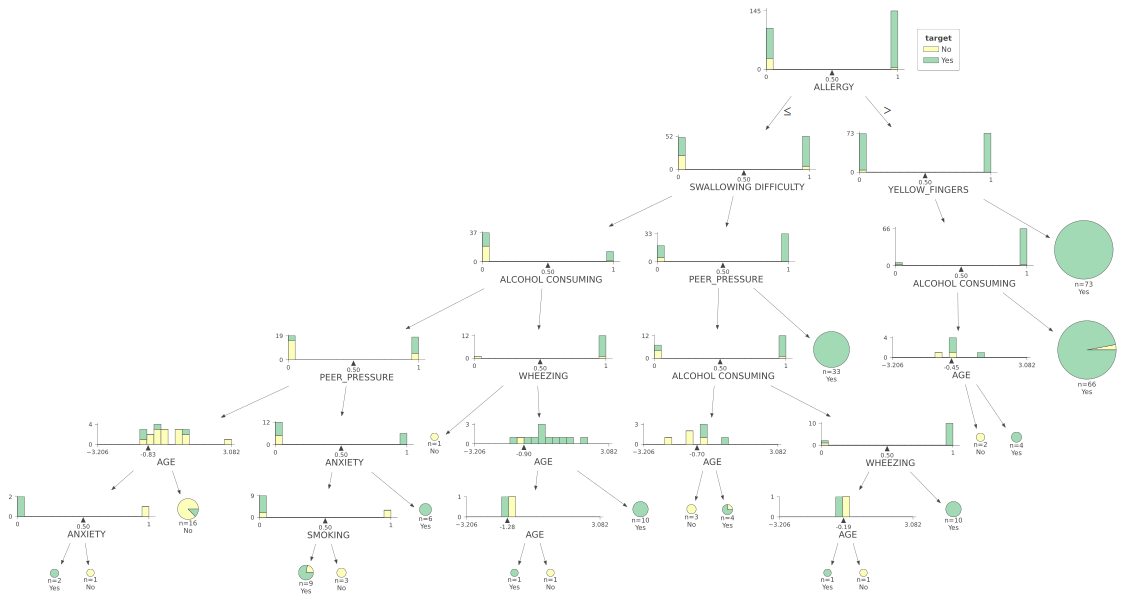

In [33]:
#! pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(classif, X_train, y_train,target_name="target",feature_names=list(X_train.columns),class_names=list(['No','Yes']))
viz

